In [2]:
# Load packages

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cmasher as cmr

import synthesizer
from synthesizer.grid import Grid
from synthesizer.load_data.load_scsam import load_SCSAM

from synthesizer.emission_models import (
    BlackHoleEmissionModel,
    GalaxyEmissionModel,
    StellarEmissionModel,
)

from synthesizer.particle.galaxy import Galaxy as ParticleGalaxy
from synthesizer.particle.stars import Stars as ParticleStars
from synthesizer.particle import BlackHoles, Gas

from unyt import Msun, yr, Mpc, angstrom

plt.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 14})

In [3]:
# Define the grid

grid_dir = '/mnt/ceph/users/snewman/grids'
grid_name = 'qsosed.hdf5'
grid_agn = Grid(grid_dir=grid_dir, grid_name=grid_name, ignore_lines=True)

print(grid_agn.masses)
print(grid_agn.accretion_rates_eddington)
print(grid_agn.cosine_inclinations)

print(len(grid_agn.lam))

grid_sps_name = 'bpass-2.2.1-bin_bpl-0.1,1.0,300.0-1.3,2.35.hdf5'
grid_sps = Grid(grid_dir=grid_dir, grid_name=grid_sps_name, ignore_lines=True)

print(len(grid_sps.lam))

# Get the grid interpolated onto the new wavelength array
grid_sps.interp_spectra(new_lam=grid_agn.lam)


[1.98841586e+36 6.28792305e+36 1.98841586e+37 6.28792305e+37
 1.98841586e+38 6.28792305e+38 1.98841586e+39 6.28792305e+39
 1.98841586e+40] kg
[0.03162278 0.05623413 0.1        0.31622777 0.56234133 1.
 1.77827941 3.16227766] dimensionless
[0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.98] dimensionless
1999
100000


/mnt/home/snewman/myenv/lib/python3.12/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning: Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).
  warnings.warn(


[Python] Creating Sed took: 0.000193 seconds
[Python] Creating Sed took: 0.000063 seconds
[Python] Creating Sed took: 0.000101 seconds
[Python] Creating Sed took: 0.000080 seconds
[Python] Creating Sed took: 0.000105 seconds
[Python] Creating Sed took: 0.000104 seconds
[Python] Creating Sed took: 0.000113 seconds
[Python] Creating Sed took: 0.000101 seconds
[Python] Creating Sed took: 0.000104 seconds


Text(0.5, 0, '$\\rm M_{BH}/M_{\\odot}$')

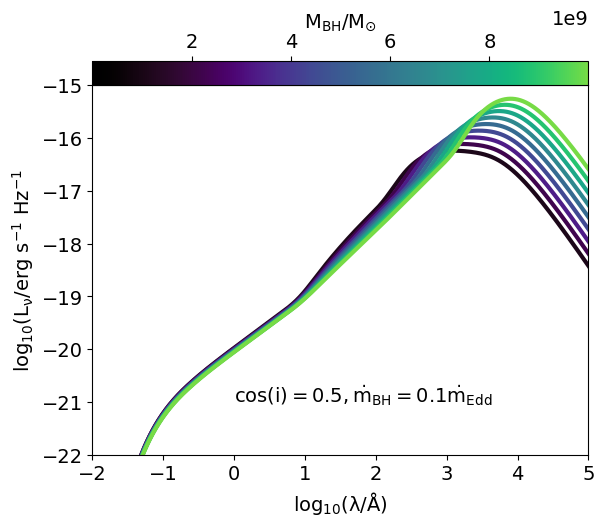

In [41]:
masses = grid_agn.masses 
masses_Msun = masses / 1.989e30
accretion_rate = grid_agn.accretion_rates_eddington[2]
inclination = grid_agn.cosine_inclinations[4]

cmap = cmr.lavender

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(masses_Msun), vmax=max(masses_Msun))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for mass_kg, mass_Msun in zip(masses, masses_Msun): 
    m = m + 1
    grid_point = grid_agn.get_grid_point(masses=mass_kg, accretion_rates_eddington=accretion_rate, cosine_inclinations=inclination)
    # get Sed object
    sed = grid_agn.get_sed_at_grid_point(grid_point, spectra_type="incident")

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                # Use the Msun value for the plot label
                label=r'$\rm mass = {:.2f}\ M_\odot$'.format(mass_Msun),
                color = cmap(m/len(masses)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-22, top=-15)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s=r'$\rm cos(i)=0.5 , \dot{m}_{BH} = 0.1 \dot{m}_{Edd}$',x=0,y=-21)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"$\rm M_{BH}/M_{\odot}$")

999706.3147310207 kg
0.5 dimensionless
[Python] Creating Sed took: 0.000113 seconds
[Python] Creating Sed took: 0.000062 seconds
[Python] Creating Sed took: 0.000058 seconds
[Python] Creating Sed took: 0.000078 seconds
[Python] Creating Sed took: 0.000079 seconds
[Python] Creating Sed took: 0.000077 seconds
[Python] Creating Sed took: 0.000077 seconds
[Python] Creating Sed took: 0.000083 seconds


Text(0.5, 0, 'accretion rate (Eddington)')

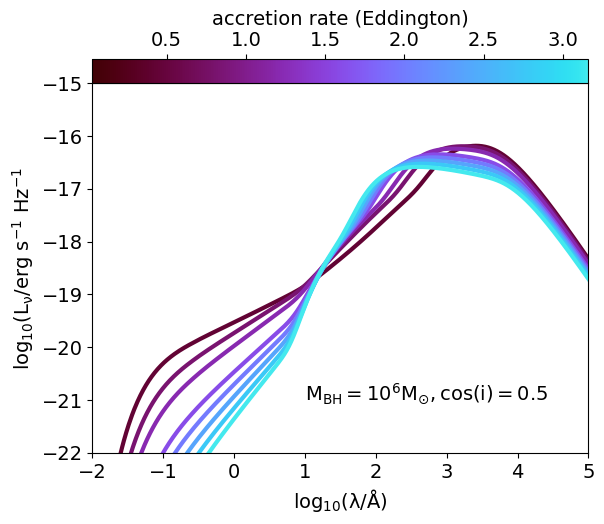

In [43]:
mass = grid_agn.masses[0]
mass_Msun = mass / 1.989e30
print(mass_Msun)
accretion_rates = grid_agn.accretion_rates_eddington
inclination = grid_agn.cosine_inclinations[4]
print(inclination)

cmap = cmr.gem

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(accretion_rates), vmax=max(accretion_rates))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for rate in accretion_rates: 
    m = m + 1
    grid_point = grid_agn.get_grid_point(masses=mass, accretion_rates_eddington=rate, cosine_inclinations=inclination)
    # get Sed object
    sed = grid_agn.get_sed_at_grid_point(grid_point, spectra_type="incident")

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                color = cmap(m/len(accretion_rates)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-22, top=-15)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s=r'$\rm M_{BH}=10^6M_{\odot} , cos(i)=0.5$',x=1,y=-21)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"accretion rate (Eddington)")

1.98841586e+36 kg
0.1 dimensionless
[Python] Creating Sed took: 0.000120 seconds
[Python] Creating Sed took: 0.000081 seconds
[Python] Creating Sed took: 0.000101 seconds
[Python] Creating Sed took: 0.000065 seconds
[Python] Creating Sed took: 0.000101 seconds
[Python] Creating Sed took: 0.000104 seconds
[Python] Creating Sed took: 0.000103 seconds
[Python] Creating Sed took: 0.000105 seconds
[Python] Creating Sed took: 0.000078 seconds
[Python] Creating Sed took: 0.000100 seconds


Text(0.5, 0, 'cos(i)')

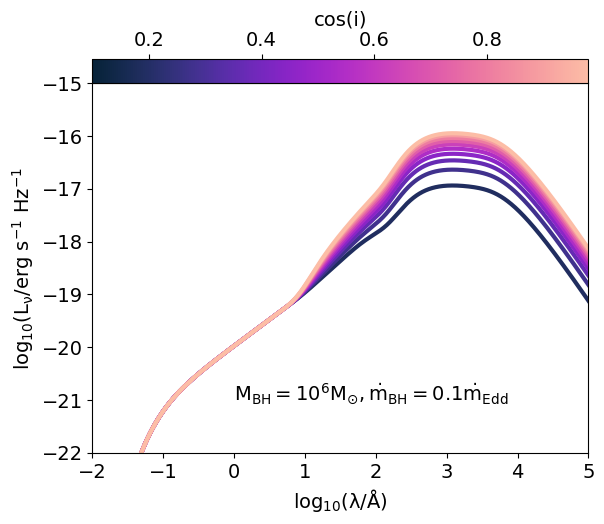

In [44]:
mass = grid_agn.masses[0]
print(mass)
accretion_rate = grid_agn.accretion_rates_eddington[2]
print(accretion_rate)
inclinations = grid_agn.cosine_inclinations

cmap = cmr.bubblegum

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(inclinations), vmax=max(inclinations))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for inc in inclinations: 
    m = m + 1
    grid_point = grid_agn.get_grid_point(masses=mass, accretion_rates_eddington=accretion_rate, cosine_inclinations=inc)
    # get Sed object
    sed = grid_agn.get_sed_at_grid_point(grid_point, spectra_type="incident")

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                color = cmap(m/len(inclinations)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-22, top=-15)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s=r'$\rm M_{BH}=10^6M_{\odot} , \dot{m}_{BH}=0.1\dot{m}_{Edd}$',x=0,y=-21)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"cos(i)")

In [ ]:
# Load data from SC-SAM

sv = "0_0_0"

sam_dir = '/mnt/ceph/users/lperez/AGNmodelingSCSAM/sam_newAGNcode_forestmgmt_fidSAM'

with h5py.File(f'{sam_dir}/volume.hdf5', 'r') as file:

        # Load properties
        bh_mass_sub = file[f'{sv}/Galprop/GalpropMBH'][:] * 1e9
        bh_mdot_sub = file[f'{sv}/Galprop/GalpropMaccdot_bright'][:]
        star_mass_sub = file[f'{sv}/Galprop/GalpropMstar'][:] * 1e9

        sfh = file[f'{sv}/Histprop/HistpropSFH'][:]
        z_hist = file[f'{sv}/Histprop/HistpropZt'][:]

        to_gal_prop = file[f'{sv}/Linkprop/LinkproptoGalprop'][:]
        redshift = file[f'{sv}/Linkprop/LinkpropRedshift'][:]

        sfh_t_bins = file[f'{sv}/Header/SFH_tbins'][:]

        # Align galaxy properties using mapping
        bh_mass = bh_mass_sub[to_gal_prop]
        bh_mdot = bh_mdot_sub[to_gal_prop]
        star_mass = star_mass_sub[to_gal_prop]

# Apply BH mass cut (M_BH > 1e6)
mass_cut = bh_mass > 1e6

bh_mass = bh_mass[mass_cut]
bh_mdot = bh_mdot[mass_cut]
star_mass = star_mass[mass_cut]
redshift = redshift[mass_cut]
sfh = sfh[mass_cut]
z_hist = z_hist[mass_cut]

print(sfh.shape) # (141636, 1405)
print(sfh_t_bins.shape) # (1405,)
print(len(bh_mass)) # 141636 (n gals)


(92016, 1405)
(1405,)
92016


In [9]:
print(len(sfh_t_bins))
print(len(sfh))
print(len(redshift))
print(len(bh_mass  ))

1405
92016
92016
92016


In [10]:
def load_SCSAM_particle_galaxy(SFH, age_lst, Z_hist, bh_mass, bh_mdot, z, verbose=False):
    """Treat each age bin as a particle, using metallicity history."""

    # First load SFH data

    p_imass = []  # initial mass
    p_age = []    # age
    p_Z = []      # metallicity

    age_len = len(age_lst)

    if verbose:
        print("Iterating through SFH bins...")

    for age_ind in range(age_len):
        # Check if all SFH values in the slice are zero
        if (SFH[age_ind] == 0).all():
            continue
        p_imass.append(SFH[age_ind])       # 10^9 Msun
        p_age.append(age_lst[age_ind])     # Gyr
        p_Z.append(Z_hist[age_ind])        # unitless (Zsun)

    # Convert units
    p_imass = np.array(p_imass) * 1e9  # Msun
    p_age = np.array(p_age) * 1e9      # yr
    p_Z = np.array(p_Z)

    # Create stars object
    stars = ParticleStars(
        initial_masses=p_imass * Msun, ages=p_age * yr, metallicities=p_Z
    )

    print('nstars = ', len(p_imass))

    # Add black hole properties

    black_holes=BlackHoles(
            masses=np.array([bh_mass]) * Msun,
            accretion_rates=np.array([bh_mdot]) * Msun/yr,
            #coordinates=bh_pos * Mpc,
            redshift=np.array([z])
        )
    
    # Add gas properties 

    # Build galaxy
    return ParticleGalaxy(stars=stars,
                          black_holes=black_holes)

/tmp/ipykernel_1596290/3185757517.py:5: RuntimeWarning: divide by zero encountered in log10
  log_mdot = np.log10(np.array(bh_mdot))


-inf 1.0881432


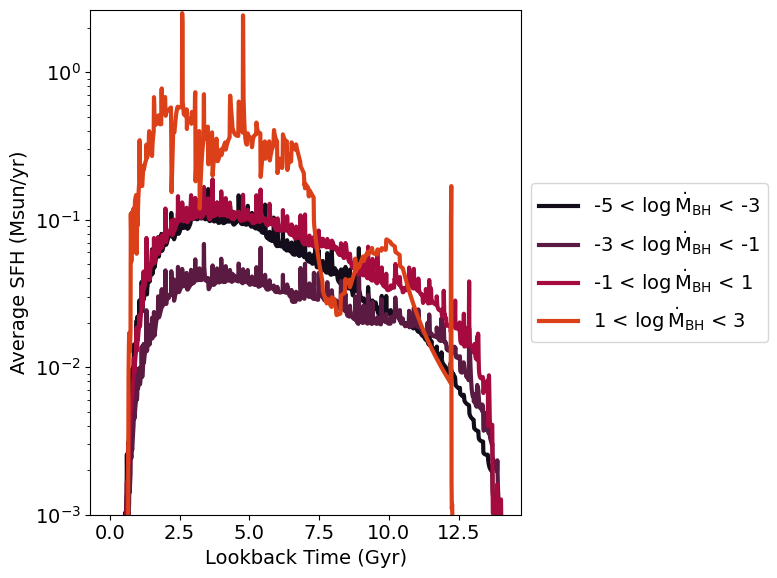

Bin 0: -5 < log Ṁ_BH < -3 → 3186 galaxies
Bin 1: -3 < log Ṁ_BH < -1 → 946 galaxies
Bin 2: -1 < log Ṁ_BH < 1 → 95 galaxies
Bin 3: 1 < log Ṁ_BH < 3 → 1 galaxies


In [11]:
# Convert sfh_t_bins to lookback time in Gyr (assuming input is in yr)
lookback_time = sfh_t_bins 

# Put galaxies into bins of BH accretion rate
log_mdot = np.log10(np.array(bh_mdot)) 
print(min(log_mdot), max(log_mdot))
bins = [-5, -3, -1, 1, 3]  # example: log10(Msun/yr)
labels = [
    fr"{bins[i]} < $\log \dot{{\rm M}}_{{\rm BH}}$ < {bins[i+1]}"
    for i in range(len(bins)-1)
]
bin_ids = np.digitize(log_mdot, bins) - 1

# Average SFH per accretion rate bin
mean_sfh = []
for b in range(len(bins)-1):
    mask = bin_ids == b
    if np.sum(mask) > 0:
        mean_sfh.append(np.mean(sfh[mask, :], axis=0))
    else:
        mean_sfh.append(np.zeros_like(sfh_t_bins))

# Plot

colors = cmr.take_cmap_colors('cmr.ember', len(bins), return_fmt='hex', cmap_range=(0.1, 0.8)) 

plt.figure(figsize=(8,6))
for i, hist in enumerate(mean_sfh):
    plt.plot(lookback_time, hist, label=labels[i], lw=3, color=colors[i])

#plt.xlim(lookback_time.max(), 0)  # high lookback -> early universe
plt.ylim(bottom=1e-3)
plt.yscale('log')
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("Average SFH (Msun/yr)")

# Legend outside on the right
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

for b in range(len(bins)-1):
    n_gals = np.sum(bin_ids == b)
    print(f"Bin {b}: {bins[b]} < log Ṁ_BH < {bins[b+1]} → {n_gals} galaxies")



6.000061 11.576106


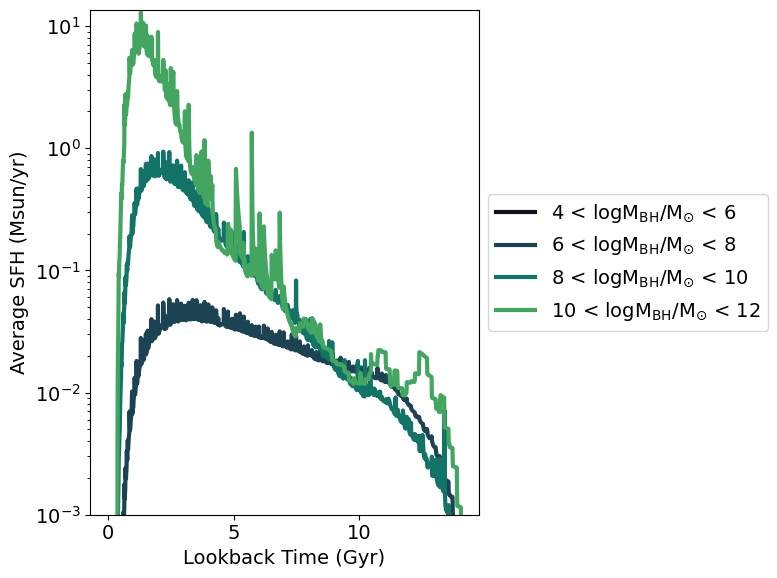

Bin 0: 4 < log M/Msun < 6 → 0 galaxies
Bin 1: 6 < log M/Msun < 8 → 79651 galaxies
Bin 2: 8 < log M/Msun < 10 → 12221 galaxies
Bin 3: 10 < log M/Msun < 12 → 144 galaxies


In [12]:
# Convert sfh_t_bins to lookback time in Gyr (assuming input is in yr)
lookback_time = sfh_t_bins 

# Put galaxies into bins of BH mass
log_mass = np.log10(np.array(bh_mass)) # log Msun
print(min(log_mass), max(log_mass))
bins = [4, 6, 8, 10, 12]  # example: log10(Msun/yr)
labels = [
    fr"{bins[i]} < $\rm log M_{{BH}}/M_{{\odot}}$ < {bins[i+1]}"
    for i in range(len(bins)-1)
]
bin_ids = np.digitize(log_mass, bins) - 1

# Average SFH per mass bin
mean_sfh = []
for b in range(len(bins)-1):
    mask = bin_ids == b
    if np.sum(mask) > 0:
        mean_sfh.append(np.mean(sfh[mask, :], axis=0))
    else:
        mean_sfh.append(np.zeros_like(sfh_t_bins))

# Plot

colors = cmr.take_cmap_colors('cmr.swamp', len(bins), return_fmt='hex', cmap_range=(0.1, 0.8)) 

plt.figure(figsize=(8,6))
for i, hist in enumerate(mean_sfh):
    plt.plot(lookback_time, hist, label=labels[i], lw=3, color=colors[i])

#plt.xlim(lookback_time.max(), 0)  # high lookback -> early universe
plt.ylim(bottom=1e-3)
plt.yscale('log')
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("Average SFH (Msun/yr)")

# Legend outside on the right
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

for b in range(len(bins)-1):
    n_gals = np.sum(bin_ids == b)
    print(f"Bin {b}: {bins[b]} < log M/Msun < {bins[b+1]} → {n_gals} galaxies")

9.000182 12.175355


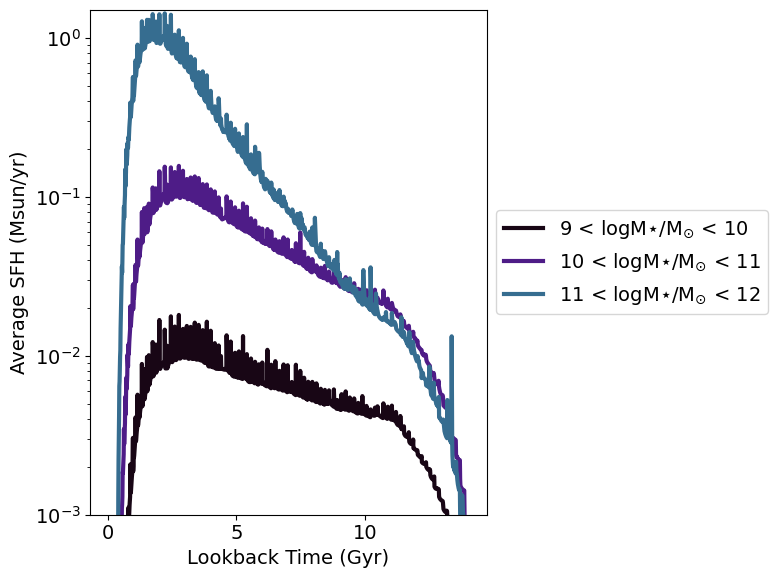

Bin 0: 9 < log M*/Msun < 10 → 44724 galaxies
Bin 1: 10 < log M*/Msun < 11 → 40733 galaxies
Bin 2: 11 < log M*/Msun < 12 → 6541 galaxies


In [16]:
# Convert sfh_t_bins to lookback time in Gyr (assuming input is in yr)
lookback_time = sfh_t_bins 

# Put galaxies into bins of stellar mass
log_mass = np.log10(np.array(star_mass)) # log Msun
print(min(log_mass), max(log_mass))
bins = [9, 10, 11, 12]  # example: log10(Msun/yr)
labels = [
    fr"{bins[i]} < $\rm log M{{\star}}/M_{{\odot}}$ < {bins[i+1]}"
    for i in range(len(bins)-1)
]
bin_ids = np.digitize(log_mass, bins) - 1

# Average SFH per mass bin
mean_sfh = []
for b in range(len(bins)-1):
    mask = bin_ids == b
    if np.sum(mask) > 0:
        mean_sfh.append(np.mean(sfh[mask, :], axis=0))
    else:
        mean_sfh.append(np.zeros_like(sfh_t_bins))

# Plot

colors = cmr.take_cmap_colors('cmr.lavender', len(bins), return_fmt='hex', cmap_range=(0.1, 0.8)) 

plt.figure(figsize=(8,6))
for i, hist in enumerate(mean_sfh):
    plt.plot(lookback_time, hist, label=labels[i], lw=3, color=colors[i])

#plt.xlim(lookback_time.max(), 0)  # high lookback -> early universe
plt.ylim(bottom=1e-3)
plt.yscale('log')
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("Average SFH (Msun/yr)")

# Legend outside on the right
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

for b in range(len(bins)-1):
    n_gals = np.sum(bin_ids == b)
    print(f"Bin {b}: {bins[b]} < log M*/Msun < {bins[b+1]} → {n_gals} galaxies")

In [15]:
# Make trial galaxy with stars and BHs

print(len(sfh))
print(len(sfh[0]))

for i in range(10):
    print(sfh[i])

gal = load_SCSAM_particle_galaxy(SFH=sfh[0],
                                 age_lst=sfh_t_bins,
                                 Z_hist=z_hist[0],
                                 bh_mass=bh_mass[0],
                                 bh_mdot=bh_mdot[0],
                                 #bh_pos=bh_pos[0],
                                 z=redshift[0],
                                 verbose=True)

print(gal)

141636
1405
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Iterating through SFH bins...
nstars =  1009
+-------------------------------------------------------------------------------------+
|                                       GALAXY                                        |
+-------------+-----------------------------------------------------------------------+
| Attribute   | Value                                                                 |
+-------------+-----------------------------------------------------------------------+
| galaxy_type | 'Particle'                                                            |
+-------------+-----------------------------------------------------------------------+
| stars       | <synthesizer.particle.stars.Stars object at 0x1554fd068da0>           |

/tmp/ipykernel_2059612/90139638.py:47: RuntimeWarning: 
Current mass of stars not provided, setting stellar_mass_weighted_age to
`None`
  return ParticleGalaxy(stars=stars,
/mnt/home/snewman/myenv/lib/python3.12/site-packages/synthesizer/utils/ascii_table.py:65: FutureWarning: The `photo_fluxes` attribute is deprecated. Use `photo_fnu` instead. Will be removed in v1.0.0
  self.attributes[name] = getattr(obj, name)
/mnt/home/snewman/myenv/lib/python3.12/site-packages/synthesizer/utils/ascii_table.py:65: FutureWarning: The `photo_luminosities` attribute is deprecated. Use `photo_lnu` instead. Will be removed in v1.0.0
  self.attributes[name] = getattr(obj, name)


nstars =  1234
nstars =  1043
nstars =  1227
nstars =  1310
nstars =  1026
nstars =  1184


/tmp/ipykernel_2059612/90139638.py:47: RuntimeWarning: 
Current mass of stars not provided, setting stellar_mass_weighted_age to
`None`
  return ParticleGalaxy(stars=stars,


nstars =  1273
nstars =  1201
nstars =  1252
nstars =  1103


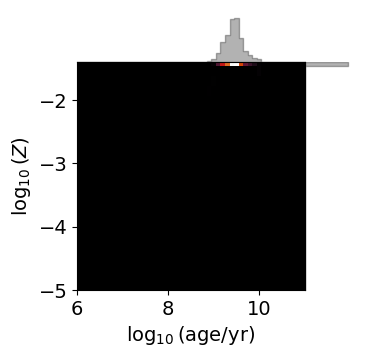

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\log_{10}(\\mathrm{age}/\\mathrm{yr})$', ylabel='$\\log_{10}(Z)$'>)

In [ ]:
# How many galaxies to load
N = 10

# For my actual code use all galaxies in the subvolume

# Load galaxies with particle method

# Random indices from n galaxies
indices = np.random.choice(len(bh_mass), size=N, replace=False)

gals = []
seds = []

for i in indices:

    gal = load_SCSAM_particle_galaxy(SFH=sfh[i],
                                    age_lst=sfh_t_bins,
                                    Z_hist=z_hist[i],
                                    bh_mass=bh_mass[i],
                                    bh_mdot=bh_mdot[i],
                                    #bh_pos=bh_pos[0],
                                    z=redshift[i],
                                    verbose=False)
    
    gals.append(gal)

    # Extract SED

    # Define emission model 
    
    stellar_incident = StellarEmissionModel(
    "stellar_incident",
    grid=grid_sps,
    extract="incident",
    fesc=0.3,
    )

    agn_incident = BlackHoleEmissionModel(
        "agn_incident",
        grid=grid,
        extract="incident",
        fesc=0.3,
    )

    combined_emission = GalaxyEmissionModel(
        "total",
        combine=(stellar_incident, agn_incident)
    )

    #combined_emission.set_per_particle(True)
    #combined_emission.plot_emission_tree()

    spectra_type = "total"  # could be "incident", "nebular", "intrinsic", etc.
    
    gal.get_spectra(combined_emission, verbose=True)
    sed = gal.spectra[spectra_type]
    seds.append((sed.lam, sed.lnu))

# Plot SFZH for the last galaxy
gal.stars.get_sfzh(log10ages=grid_sps.log10ages, log10metallicities=grid_sps.log10metallicities)
gal.stars.plot_sfzh()

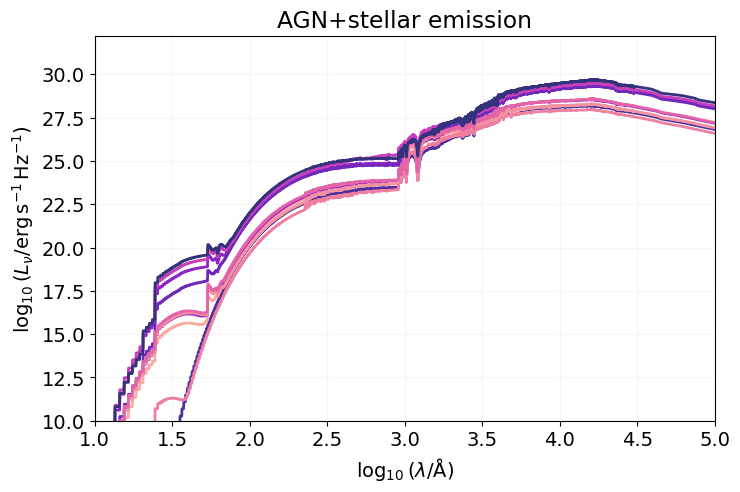

In [25]:
# Plot SEDs

# Choose a cmasher colormap, e.g., "cmr.rainforest"
cmap = cmr.get_sub_cmap("cmr.bubblegum", 0.05, 0.95)  # full range of the colormap

# Particle SEDs plotting
plt.figure(figsize=(8, 5))

for lam, lnu in seds:
    color = cmap(np.random.rand())  # pick a random color from the colormap
    plt.plot(np.log10(lam), np.log10(lnu), color=color, lw=2)

plt.xlabel(r"$\log_{10}(\lambda/\rm{\AA})$")
plt.ylabel(r"$\log_{10}(L_\nu/\rm{erg\,s^{-1}\,Hz^{-1}})$")
plt.xlim(left=1, right=5)
plt.ylim(bottom=10)
plt.title('AGN+stellar emission')
plt.grid(color="whitesmoke")
plt.show()

In [23]:
print(gals[0].black_holes.accretion_rates)
print(gals[0].black_holes.masses)

[0.] Msun/yr
[10020.] Msun
